# Title : Exploratory Data Analysis on "Google Play Store Apps" Dataset

***Submitted by:*** Shashini Shanmugan

***Date:*** 20/04/2025

GitHub Link:

***1. Introduction***
***Dataset Overview ***
For this analysis, I selected the "Google Play Store Apps" dataset from Kaggle. This dataset contains information about 10,000+ Android apps, including:

App Name, Category, Rating, Reviews, Size, Installs, Price, Content Rating, and more.

***Objective:***

Perform Univariate, Bivariate, and Multivariate Analysis to uncover trends.

Identify factors influencing app ratings, popularity, and pricing.

Use statistical tools and visualizations to draw insights.

***Dataset Details:***

***Rows:*** 10,841

***Columns:*** 13 (Key variables: Rating, Reviews, Size, Installs, Price, Category)



In [2]:
#1. Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/googleplaystore.csv.zip')
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [7]:
#2. Data Cleaning
# Check missing values
print(df.isnull().sum())

# Drop missing 'Rating' rows (important for analysis)
df.dropna(subset=['Rating'], inplace=True)

# Clean 'Size' (convert KB/MB to numeric)
# Replace 'M', 'k', and 'Varies with device' and remove commas before converting to float
# Convert the 'Size' column to string type before applying string methods
df['Size'] = df['Size'].astype(str)
df['Size'] = df['Size'].str.replace('M', 'e6').str.replace('k', 'e3').str.replace(',', '').replace('Varies with device', np.nan).astype(float)


App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          4
Android Ver          3
dtype: int64


In [8]:
#3. Univariate Analysis
print(df.describe())

            Rating          Size
count  9367.000000  7.730000e+03
mean      4.193338  2.295464e+07
std       0.537431  2.344543e+07
min       1.000000  1.000000e+03
25%       4.000000  5.300000e+06
50%       4.300000  1.400000e+07
75%       4.500000  3.300000e+07
max      19.000000  1.000000e+08


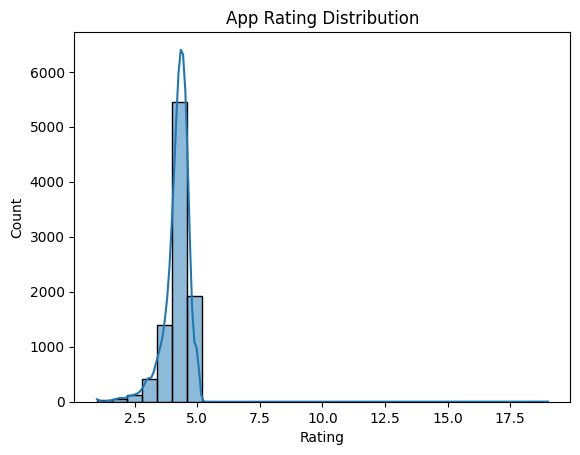

In [10]:
#Visualizations
#Histogram(Rating Distribution)
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title("App Rating Distribution")
plt.show()

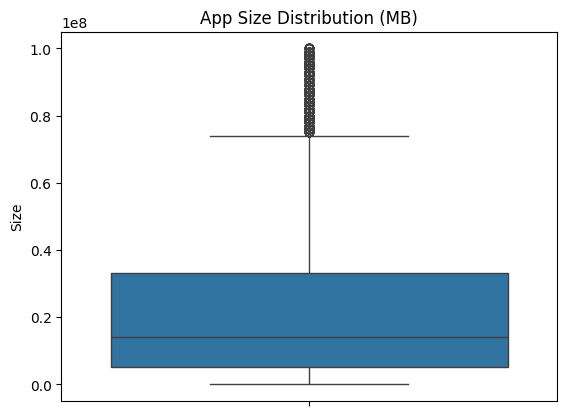

In [12]:
#Box plot(app size)
sns.boxplot(df['Size'].dropna())
plt.title("App Size Distribution (MB)")
plt.show()

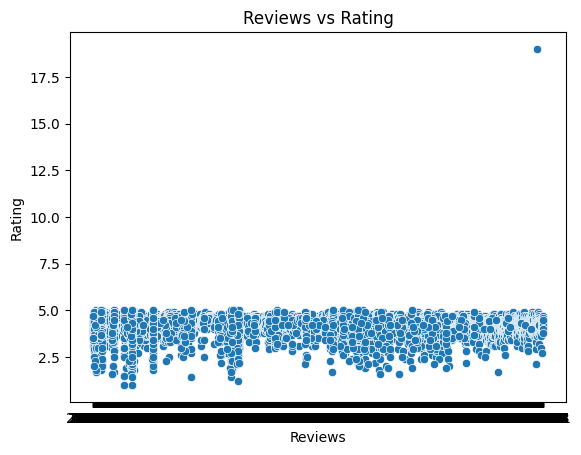

In [13]:
#4. Bivariate Analysis
#Scatter Plot (Reviews vs Rating)
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title("Reviews vs Rating")
plt.show()

In [ ]:
corr = df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [23]:
#Cross-Tabulation (Category vs Content Rating)
print(pd.crosstab(df['Category'], df['Content Rating'], normalize='index'))

Content Rating       Adults only 18+  Everyone  Everyone 10+  Mature 17+  \
Category                                                                   
ART_AND_DESIGN              0.000000  0.935484      0.016129    0.000000   
AUTO_AND_VEHICLES           0.000000  0.972603      0.013699    0.000000   
BEAUTY                      0.000000  0.928571      0.000000    0.023810   
BOOKS_AND_REFERENCE         0.000000  0.842697      0.028090    0.016854   
BUSINESS                    0.000000  0.986799      0.000000    0.000000   
COMICS                      0.034483  0.431034      0.034483    0.120690   
COMMUNICATION               0.000000  0.899390      0.000000    0.027439   
DATING                      0.000000  0.051282      0.000000    0.917949   
EDUCATION                   0.000000  0.922581      0.051613    0.019355   
ENTERTAINMENT               0.000000  0.261745      0.033557    0.060403   
EVENTS                      0.000000  0.800000      0.044444    0.000000   
FAMILY      

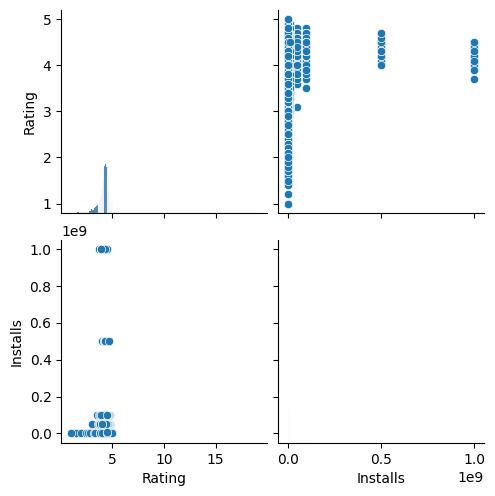

In [24]:
#Multivariate Analysis
sns.pairplot(df[['Rating', 'Reviews', 'Installs', 'Price']])
plt.show()

***6. Conclusion & Key Insights Rating Trends:***

Most apps have 4.0+ ratings, but highly reviewed apps are more consistent.

***Popularity Factors:***

Installs and Reviews are strongly linked (popular apps get more feedback).

***Pricing Impact:***

Free apps dominate, but some paid niches (Education, Medical) perform well.

***Category Insights:***

Games & Social apps are most popular, but Finance apps target older audiences.

***Recommendations***:

Developers should focus on quality (higher ratings attract more installs).

Paid apps should justify value (e.g., Education, Medical).